#**Import Dataset and Preprocess**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/cybersecurity_intrusion_data.csv")

In [3]:
data

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [4]:
data.isna().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [5]:
data["protocol_type"].value_counts()

,count
protocol_type,
TCP,6624
UDP,2406
ICMP,507


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["protocol_type_encoded"] = le.fit_transform(data["protocol_type"])



In [7]:
data

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,protocol_type_encoded
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0,1
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1,2
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1,0
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0,1
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0,1
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0,1


In [8]:
dataset = data.drop(columns=["protocol_type","encryption_used","browser_type","session_id"])

In [9]:
dataset

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_encoded
0,599,4,492.983263,0.606818,1,0,1,1
1,472,3,1557.996461,0.301569,0,0,0,1
2,629,3,75.044262,0.739164,2,0,1,1
3,804,4,601.248835,0.123267,0,0,1,2
4,453,5,532.540888,0.054874,1,0,0,1
...,...,...,...,...,...,...,...,...
9532,194,3,226.049889,0.517737,3,0,1,0
9533,380,3,182.848475,0.408485,0,0,0,1
9534,664,5,35.170248,0.359200,1,0,0,1
9535,406,4,86.664703,0.537417,1,1,0,1


#**Decision Tree**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
X = dataset.drop(columns=["attack_detected"])
Y = dataset["attack_detected"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [13]:
DTclassifier = DecisionTreeClassifier()

In [14]:
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [15]:
Y_pred = DTclassifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
DTaccuracy = accuracy_score(Y_test, Y_pred)

In [18]:
DTaccuracy

0.7845911949685535

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.49368168060798157, 0.9864864864864865, 'x[4] <= 2.5\ngini = 0.494\nsamples = 7629\nvalue = [4231, 3398]'),
 Text(0.49253743402284245, 0.9594594594594594, 'x[1] <= 6.5\ngini = 0.447\nsamples = 6384\nvalue = [4231, 2153]'),
 Text(0.493109557315412, 0.972972972972973, 'True  '),
 Text(0.4913931874377034, 0.9324324324324325, 'x[3] <= 0.6\ngini = 0.383\nsamples = 5703\nvalue = [4231.0, 1472.0]'),
 Text(0.49024894085256426, 0.9054054054054054, 'x[1] <= 3.5\ngini = 0.303\nsamples = 5201\nvalue = [4231, 970]'),
 Text(0.329876263322539, 0.8783783783783784, 'x[2] <= 3336.255\ngini = 0.269\nsamples = 2476\nvalue = [2080, 396]'),
 Text(0.24646496317515018, 0.8513513513513513, 'x[2] <= 1277.849\ngini = 0.264\nsamples = 2450\nvalue = [2067.0, 383.0]'),
 Text(0.1577617757388436, 0.8243243243243243, 'x[2] <= 215.324\ngini = 0.246\nsamples = 2002\nvalue = [1715, 287]'),
 Text(0.03840824572695416, 0.7972972972972973, 'x[2] <= 213.682\ngini = 0.296\nsamples = 564\nvalue = [462, 102]'),
 Text(0.03

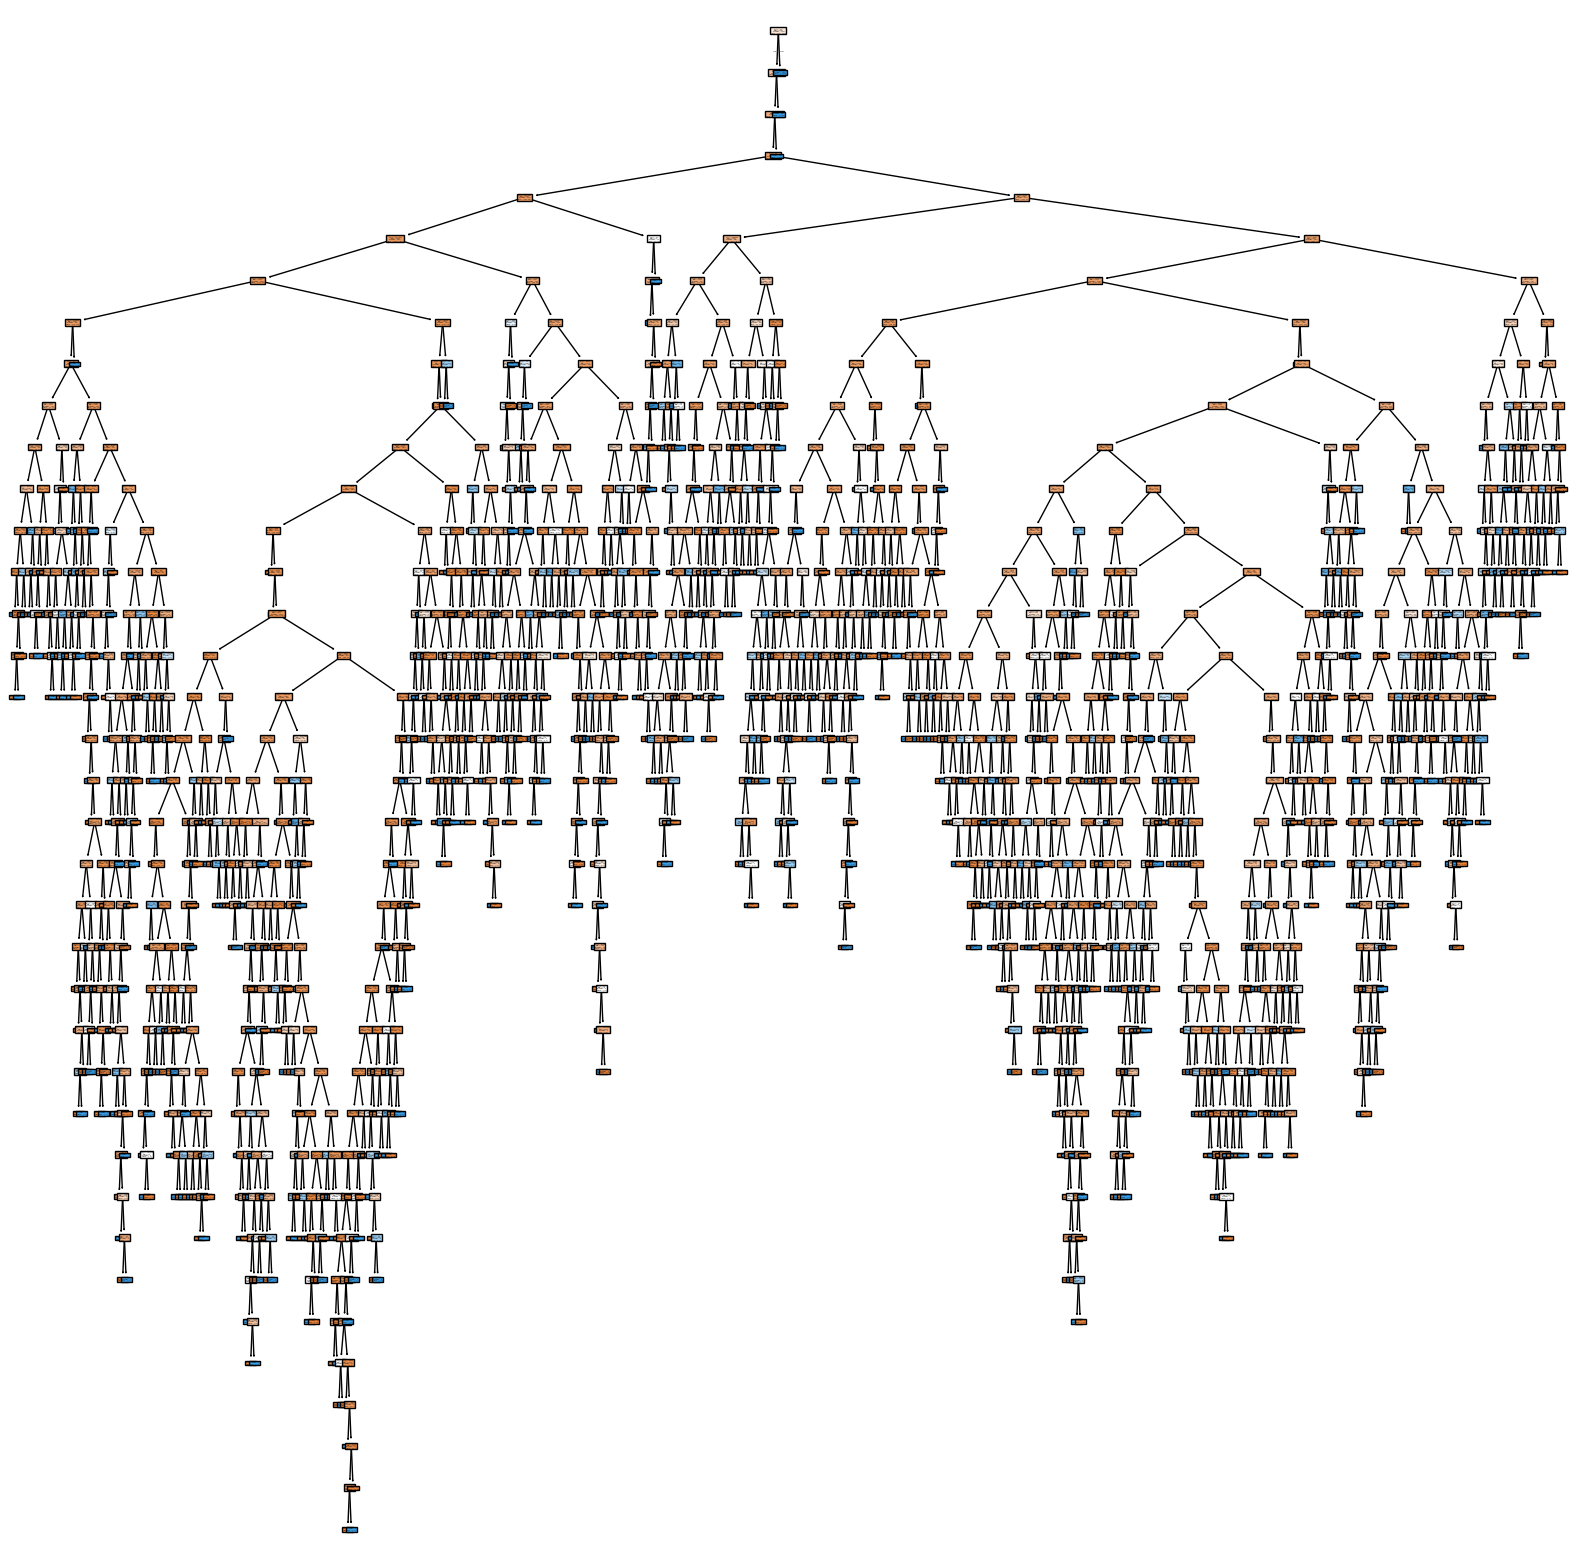

In [20]:
plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, filled=True)

#**AdaBoost**

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
base_estimator = DecisionTreeClassifier(max_depth=1)


In [23]:
adaboost = AdaBoostClassifier(estimator = base_estimator, n_estimators=70, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, Y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=70, random_state=42)

In [24]:
y_pred = adaboost.predict(X_test)

In [25]:
ADAaccuracy = accuracy_score(Y_test, y_pred)


In [26]:
ADAaccuracy

0.8679245283018868

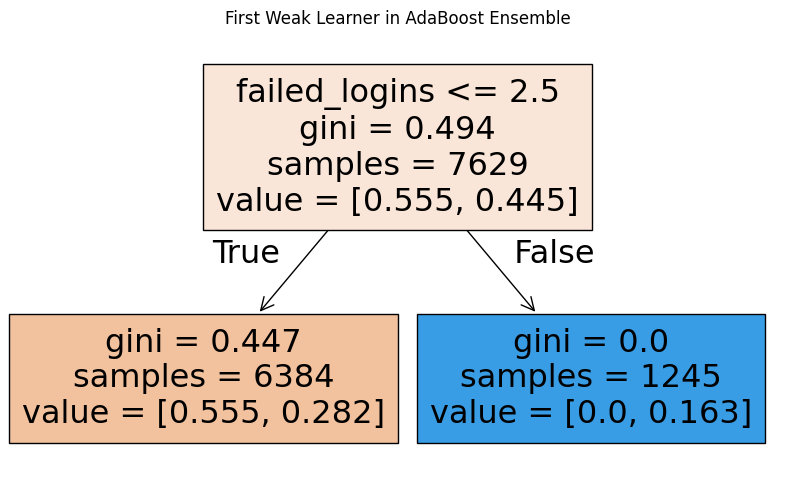

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10,6))
tree.plot_tree(adaboost.estimators_[0], filled=True, feature_names=X.columns)
plt.title("First Weak Learner in AdaBoost Ensemble")
plt.show()


#**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, Y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [30]:
y_pred_logreg = logreg.predict(X_test)


In [31]:
LRaccuracy = accuracy_score(Y_test, y_pred_logreg)


In [32]:
LRaccuracy

0.7379454926624738

#**Comparison of Models**

In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np

models = {
    "Decision Tree": DTclassifier,
    "AdaBoost": adaboost,
    "Logistic Regression": logreg
}

comparison_results = []
classification_reports = {}

print("Model-wise Evaluation:\n")

for name, model in models.items():
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)

    comparison_results.append({
        "Model": name,
        "Accuracy": acc,

    })

    classification_reports[name] = classification_report(Y_test, y_pred, output_dict=True)

results_df = pd.DataFrame(comparison_results)
print(results_df.round(4))

for model_name, report_dict in classification_reports.items():
    print(f"\n Classification Report for {model_name}:\n")
    report_df = pd.DataFrame(report_dict).transpose()
    print(report_df.round(4))


Model-wise Evaluation:

                 Model  Accuracy
0        Decision Tree    0.7846
1             AdaBoost    0.8679
2  Logistic Regression    0.7379

 Classification Report for Decision Tree:

              precision  recall  f1-score    support
0                0.8053  1.0000    0.8921  1042.0000
1                1.0000  0.7090    0.8297   866.0000
accuracy         0.8679  0.8679    0.8679     0.8679
macro avg        0.9026  0.8545    0.8609  1908.0000
weighted avg     0.8936  0.8679    0.8638  1908.0000

 Classification Report for AdaBoost:

              precision  recall  f1-score    support
0                0.8053  1.0000    0.8921  1042.0000
1                1.0000  0.7090    0.8297   866.0000
accuracy         0.8679  0.8679    0.8679     0.8679
macro avg        0.9026  0.8545    0.8609  1908.0000
weighted avg     0.8936  0.8679    0.8638  1908.0000

 Classification Report for Logistic Regression:

              precision  recall  f1-score    support
0                0.805